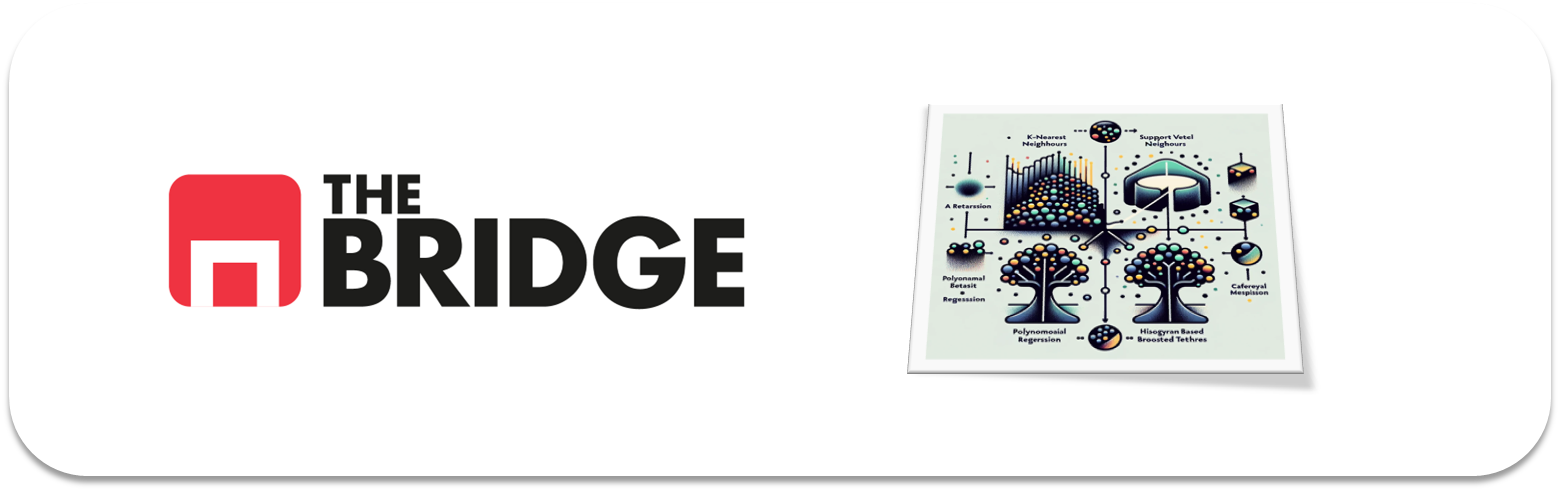

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Evitar los warning
import warnings
warnings.filterwarnings("ignore")

# Mejora características de impresión
from pprint import pprint

# Tratamiento de variables categóricas
from sklearn.preprocessing import OrdinalEncoder
pd.get_dummies # para one-hot encoding

# Tratamiento variables numéricas
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Separación df
from sklearn.model_selection import train_test_split

# Evaluación regresión lineal
from sklearn import linear_model, metrics, model_selection
from sklearn.model_selection import cross_val_score

# Regularización
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Evaluación regresión logística
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error



# Entrenamiento modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

# Hacer 'x' subconjuntos de 'y' elementos
from sklearn.model_selection import StratifiedShuffleSplit

# Acumular los resultados de la evaluación 'accuracy' en una lista
from sklearn.metrics import accuracy_score
# Representar el árbol de forma visual
from sklearn.tree import plot_tree

# Optimización hiperparámetros
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# Ensamblados
from sklearn.ensemble import RandomForestClassifier # Clasificación
from sklearn.ensemble import RandomForestRegressor # Regresión
from sklearn.ensemble import AdaBoostClassifier # Clasificación
from sklearn.ensemble import AdaBoostRegressor # Regresión
from sklearn.ensemble import GradientBoostingRegressor # Regresión
from sklearn.ensemble import GradientBoostingClassifier # Clasificación
from xgboost import XGBRFRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostRegressor, Pool
from catboost import CatBoostClassifier

# Otros modelos supervisados
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC # "support vector classifier"
from sklearn.svm import SVR # "support vector regressor"

# Para diferentes gráficos
from sklearn.pipeline import make_pipeline 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

# Obtener todas las métrica que acepta "scoring"
from sklearn.metrics import get_scorer_names # y se pone get_scorer_names()


# Equilibrado de clases
from imblearn.over_sampling import SMOTE # Nuevos amigos para ayudaros
from imblearn.under_sampling import RandomUnderSampler # Nuevos amigos para ayudarnos
from sklearn.utils import resample

from EDA_function_tools import *
from toolbox_ML import *


### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [3]:
df = pd.read_csv('./data/credit_npo.csv')
df.head(8)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

| Índice | Variable en Inglés                        | Significado                           | Tipo de Dato   | Número de Valores No Nulos |
|--------|-------------------------------------------|--------------------------------------------------|----------------|---------------------------|
| 0      | SeriousDlqin2yrs                          | Incumplimiento Grave en 2 Años                   | int64          | 12537                     |
| 1      | RevolvingUtilizationOfUnsecuredLines      | Utilización Revolvente de Líneas No Aseguradas   | float64        | 12537                     |
| 2      | age                                       | Edad                                             | int64          | 12537                     |
| 3      | NumberOfTime30-59DaysPastDueNotWorse      | Número de Veces 30-59 Días Atrasado, No Peor     | int64          | 12537                     |
| 4      | DebtRatio                                 | Ratio de Deuda                                   | float64        | 12537                     |
| 5      | MonthlyIncome                             | Ingreso Mensual                                  | float64        | 11816                     |
| 6      | NumberOfOpenCreditLinesAndLoans           | Número de Líneas de Crédito y Préstamos Abiertos | int64          | 12537                     |
| 7      | NumberOfTimes90DaysLate                   | Número de Veces 90 Días de Retraso                | int64          | 12537                     |
| 8      | NumberRealEstateLoansOrLines              | Número de Préstamos o Líneas de Bienes Raíces    | int64          | 12537                     |
| 9      | NumberOfTime60-89DaysPastDueNotWorse      | Número de Veces 60-89 Días Atrasado, No Peor     | int64          | 12537                     |
| 10     | NumberOfDependents                        | Número de Dependientes                           | float64        | 12360                     |


In [5]:
describe_df(df).T

,DATE_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
SeriousDlqin2yrs,int64,0.0,2,0.02
RevolvingUtilizationOfUnsecuredLines,float64,0.0,10764,85.86
age,int64,0.0,78,0.62
NumberOfTime30-59DaysPastDueNotWorse,int64,0.0,10,0.08
DebtRatio,float64,0.0,11547,92.1
MonthlyIncome,float64,5.75,4167,35.27
NumberOfOpenCreditLinesAndLoans,int64,0.0,43,0.34
NumberOfTimes90DaysLate,int64,0.0,13,0.1
NumberRealEstateLoansOrLines,int64,0.0,16,0.13
NumberOfTime60-89DaysPastDueNotWorse,int64,0.0,8,0.06


In [6]:
tipifica_variables(df,10,30)

,nombre_variable,tipo_sugerido
0,SeriousDlqin2yrs,Binaria
1,RevolvingUtilizationOfUnsecuredLines,Numérica Continua
2,age,Numérica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,Numérica Discreta
4,DebtRatio,Numérica Continua
5,MonthlyIncome,Numérica Continua
6,NumberOfOpenCreditLinesAndLoans,Numérica Discreta
7,NumberOfTimes90DaysLate,Numérica Discreta
8,NumberRealEstateLoansOrLines,Numérica Discreta
9,NumberOfTime60-89DaysPastDueNotWorse,Categórica


### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

**Problema de negocio**: Predecir si una persona va a enonctrarse en dificultades financieras  
**Problema técnico**: problema de clasifición de `recall`. Entiendo que querrán saber cuántos de sus clientes pueden tener dificultades financieras para devolver el crédito y querrán sobrestimarlo llegado el caso (meter alguno más de los que realmente van a ser al final).  
**Target**: es la variable `SeriousDlqin2yrs`

### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [7]:
df['SeriousDlqin2yrs'].value_counts(normalize=True)

SeriousDlqin2yrs
0    0.931084
1    0.068916
Name: proportion, dtype: float64

<Axes: >

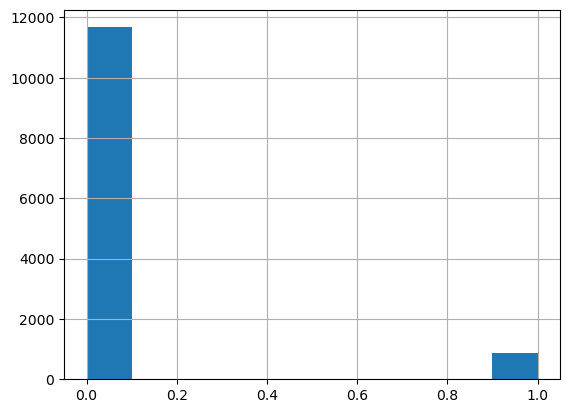

In [8]:
df['SeriousDlqin2yrs'].hist()

Está muy desbalanceada.

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

#### Análisis de variables

##### Nulos

Hay dos variables con nulos:
- MonthlyIncome
- NumberOfDependents

Voy a ver qué correlación hay entre variables para ver si se puede imputar un valor más preciso que solo la media/mediana

In [9]:
df['MonthlyIncome'].describe().round(2)

count     11816.00
mean       6864.82
std       11855.91
min           0.00
25%        3498.75
50%        5416.00
75%        8300.00
max      702500.00
Name: MonthlyIncome, dtype: float64

In [10]:
df[['NumberOfDependents']].describe().round(2)

,NumberOfDependents
count,12360.00
mean,0.82
std,1.14
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,10.00


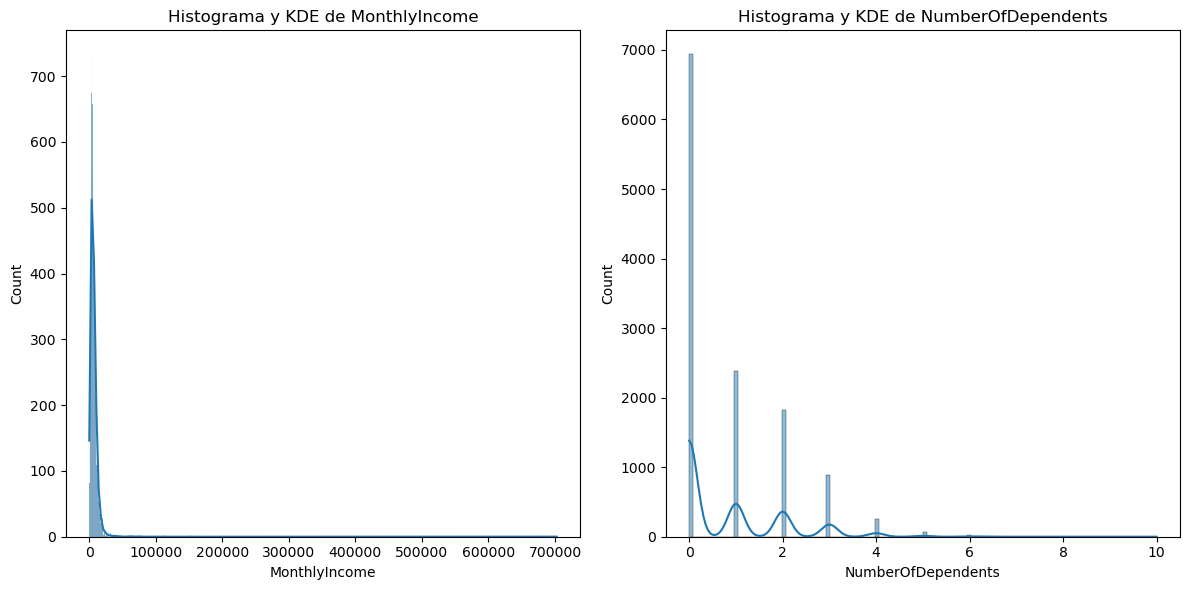

In [11]:
plot_histo_den(df,['MonthlyIncome','NumberOfDependents'])

In [12]:
df.corr()
corr_matrix = df.corr()
corr_matrix[['MonthlyIncome', 'NumberOfDependents']]

,MonthlyIncome,NumberOfDependents
SeriousDlqin2yrs,-0.022199,0.045063
RevolvingUtilizationOfUnsecuredLines,-0.046920,0.072876
age,0.053273,-0.221060
NumberOfTime30-59DaysPastDueNotWorse,-0.012814,-0.014377
DebtRatio,-0.036568,-0.092470
MonthlyIncome,1.000000,0.075561
NumberOfOpenCreditLinesAndLoans,0.105096,0.054832
NumberOfTimes90DaysLate,-0.015646,-0.019716
NumberRealEstateLoansOrLines,0.162305,0.138442
NumberOfTime60-89DaysPastDueNotWorse,-0.013327,-0.021892


In [13]:
df.groupby(['NumberRealEstateLoansOrLines'])['MonthlyIncome'].median()

NumberRealEstateLoansOrLines
0      4000.0
1      5562.0
2      7083.0
3      8985.0
4      9443.0
5     11708.0
6     10166.0
7     10116.0
8     15100.0
9     12416.5
10    15000.0
11    13392.0
12    15000.0
13     8333.0
16    16472.5
19    20500.0
Name: MonthlyIncome, dtype: float64

Utilizaré la mediana con respecto a la variable con la que más correlación tiene para rellenar los nulos de 'MonthlyIncome'

In [14]:
df.groupby('age')['NumberOfDependents'].median()

age
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
      ... 
94     0.0
95     0.0
96     0.0
97     0.0
101    0.0
Name: NumberOfDependents, Length: 78, dtype: float64

Utilizaré la mediana con la variable con la que más correlación tiene para rellenar los nulos de 'NumberOfDependets'

##### Duplicados

Reviso si hay duplicados

In [15]:
df.duplicated().sum()

13

In [16]:
df.loc[df.duplicated(keep='first')]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1768,0,1.0,40,0,0.0,NaN,0,0,0,0,0.0
2225,0,1.0,24,0,0.0,NaN,1,0,0,0,0.0
3602,0,1.0,54,0,0.0,NaN,0,0,0,0,0.0
7330,0,1.0,52,0,0.0,NaN,0,0,0,0,0.0
7383,0,0.0,81,0,0.0,NaN,2,0,0,0,0.0
7693,0,1.0,43,0,0.0,NaN,0,0,0,0,0.0
8618,0,0.0,81,0,0.0,NaN,4,0,0,0,0.0
9732,0,0.0,56,0,0.0,NaN,3,0,0,0,0.0
9865,0,0.0,61,0,0.0,NaN,1,0,0,0,0.0
11445,0,1.0,22,0,0.0,NaN,0,0,0,0,NaN


In [17]:
df.loc[df.duplicated(keep='last')]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
66,0,1.0,22,0,0.0,NaN,0,0,0,0,NaN
237,0,1.0,24,0,0.0,NaN,1,0,0,0,0.0
723,0,1.0,40,0,0.0,NaN,0,0,0,0,0.0
2903,0,1.0,54,0,0.0,NaN,0,0,0,0,0.0
3562,0,1.0,27,0,0.0,NaN,0,0,0,0,0.0
3810,0,0.0,56,0,0.0,NaN,3,0,0,0,0.0
4402,0,1.0,50,0,0.0,NaN,0,0,0,0,0.0
5083,0,0.0,81,0,0.0,NaN,2,0,0,0,0.0
5276,0,1.0,52,0,0.0,NaN,0,0,0,0,0.0
5384,0,0.0,61,0,0.0,NaN,1,0,0,0,0.0


Hay 13 duplicados

Antes de imputar nada hago la separción entre train y test.  
Primero se lo aplico a train y luego se lo aplicaré a test.

#### Separación train y test set

Hago la separación entre train_set y test_set estratificando por la variable target ('SeriousDlqin2yrs') dado que está muy desbalanceada y podría no coger valores positivos en el train_set o test_set

In [18]:
train_set, test_set = train_test_split(df,test_size=0.2,stratify=df['SeriousDlqin2yrs'],random_state=42)
print(len(train_set))
print(len(test_set))

10029
2508


In [19]:
# Reviso proporciones
train_set['SeriousDlqin2yrs'].value_counts(normalize = True)

SeriousDlqin2yrs
0    0.9311
1    0.0689
Name: proportion, dtype: float64

In [20]:
# Reviso proporciones
test_set['SeriousDlqin2yrs'].value_counts(normalize = True)

SeriousDlqin2yrs
0    0.931021
1    0.068979
Name: proportion, dtype: float64

#### Limpieza de datos (train_set)

Elimino duplicados

In [21]:
train_set_copy = train_set.copy()
train_set.drop_duplicates(keep='first', inplace=True)
train_set.shape

(10020, 11)

Relleno nulos

In [22]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10020 entries, 8818 to 10443
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      10020 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  10020 non-null  float64
 2   age                                   10020 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  10020 non-null  int64  
 4   DebtRatio                             10020 non-null  float64
 5   MonthlyIncome                         9445 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       10020 non-null  int64  
 7   NumberOfTimes90DaysLate               10020 non-null  int64  
 8   NumberRealEstateLoansOrLines          10020 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  10020 non-null  int64  
 10  NumberOfDependents                    9880 non-null   float64
dtypes: float64(4), in

In [23]:
# Variable 'MonthlyIncome'
train_set['mediana_income'] = train_set.groupby(['NumberRealEstateLoansOrLines'])['MonthlyIncome'].transform('median')
train_set['MonthlyIncome'].fillna(train_set['mediana_income'], inplace = True)

In [24]:
# Me quedo con la mediana aplicada a train_set para luego aplicárselo a test_est
temp = train_set[['NumberRealEstateLoansOrLines','mediana_income']]
mediana_monthly = temp.drop_duplicates(keep = 'first')
mediana_monthly.sort_values('NumberRealEstateLoansOrLines')

,NumberRealEstateLoansOrLines,mediana_income
337,0,4000.0
4520,1,5550.0
11943,2,7046.0
8818,3,9000.0
8137,4,9443.0
1646,5,11333.0
11783,6,10450.0
4087,7,11275.0
3638,8,12500.0
6761,9,16000.0


In [25]:
# Variable 'NumberOfDependents'
train_set['mediana_dependents'] = df.groupby('age')['NumberOfDependents'].transform('median')
train_set['NumberOfDependents'].fillna(train_set['mediana_dependents'],inplace = True)

In [26]:
temp = train_set[['age', 'mediana_dependents']]
mediana_dep = temp.drop_duplicates(keep='first')
mediana_dep.sort_values('age')

,age,mediana_dependents
5476,21,0.0
8241,22,0.0
9882,23,0.0
10623,24,0.0
1182,25,0.0
...,...,...
2282,94,0.0
5903,95,0.0
7405,96,0.0
190,97,0.0


In [27]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10020 entries, 8818 to 10443
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      10020 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  10020 non-null  float64
 2   age                                   10020 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  10020 non-null  int64  
 4   DebtRatio                             10020 non-null  float64
 5   MonthlyIncome                         10020 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       10020 non-null  int64  
 7   NumberOfTimes90DaysLate               10020 non-null  int64  
 8   NumberRealEstateLoansOrLines          10020 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  10020 non-null  int64  
 10  NumberOfDependents                    10020 non-null  float64
 11  mediana_income   

#### Mini EDA

##### Análisis Univariable

In [28]:
features_num = train_set.select_dtypes(include=('int','float')).columns.tolist()
features_num

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'mediana_income',
 'mediana_dependents']

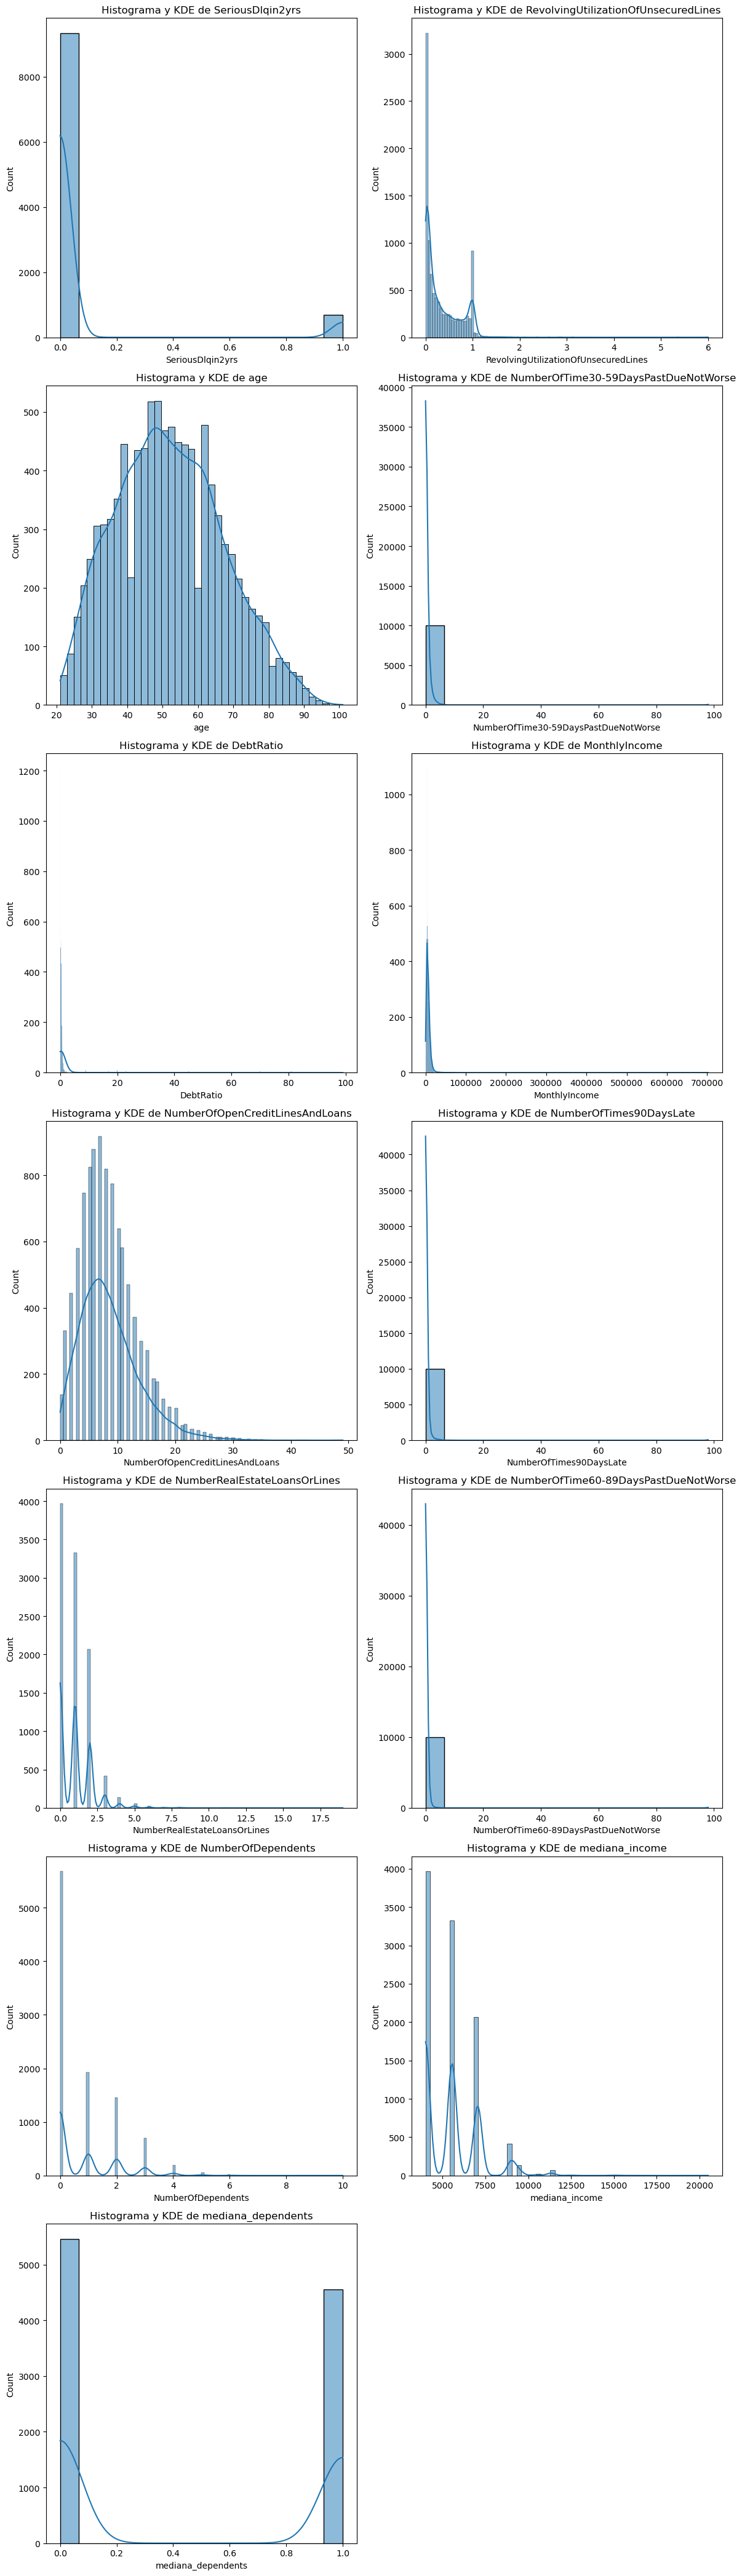

In [29]:
plot_histo_den(train_set,features_num)

Variables que habría que aplicar transformación logarítmica y psoterior estandarización:
['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome','NumberOfTimes90DaysLate',  'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
Varaibles que se aplicará solo estandarización:
['age', 'NumberOfOpenCreditLinesAndLoans']

##### Análisis bivariable

In [30]:
abs(corr_matrix['SeriousDlqin2yrs'].round(2)).sort_values(ascending=False)

SeriousDlqin2yrs                        1.00
RevolvingUtilizationOfUnsecuredLines    0.28
age                                     0.12
NumberOfTime30-59DaysPastDueNotWorse    0.12
NumberOfTimes90DaysLate                 0.12
NumberOfTime60-89DaysPastDueNotWorse    0.09
NumberOfDependents                      0.05
NumberOfOpenCreditLinesAndLoans         0.03
DebtRatio                               0.02
MonthlyIncome                           0.02
NumberRealEstateLoansOrLines            0.01
Name: SeriousDlqin2yrs, dtype: float64

Hay muy poca correlación entre variables.
De momento voy a meter todas y a ver luego cuál es el festure importance de las mismas

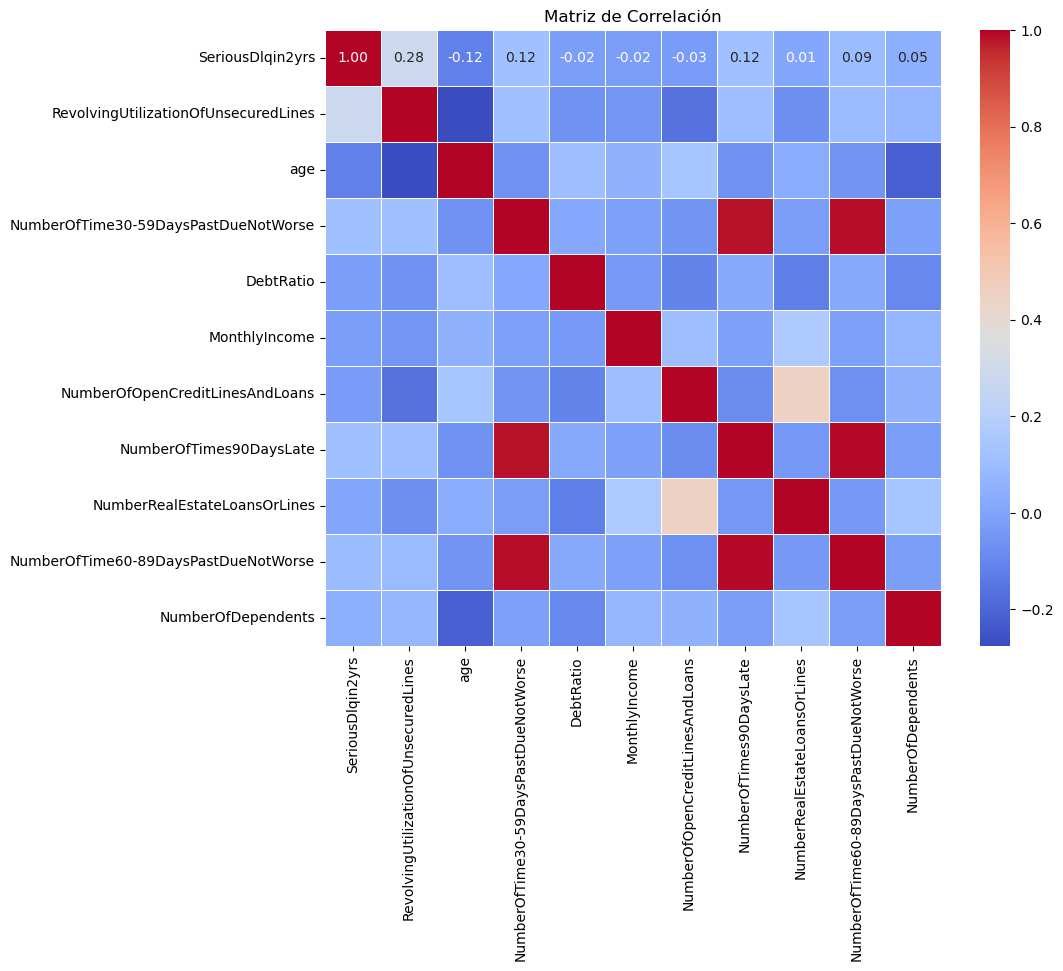

In [31]:
# Lo vemos también de forma visual
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",
        cbar=True, square=True, linewidths=.5) 

plt.title('Matriz de Correlación')
plt.xticks() 
plt.yticks() 

plt.show()


#### Tratamiento de features

In [32]:
train_set.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'mediana_income', 'mediana_dependents'],
      dtype='object')

In [33]:
# Aplicación transformación logarítmica y normalización
features_log = ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 
                'MonthlyIncome','NumberOfTimes90DaysLate',  'NumberRealEstateLoansOrLines',
                'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']

# Solo normailización
features_scaler = ['age','NumberOfOpenCreditLinesAndLoans']

scaler = StandardScaler()

# Diccionarios para guardar los scalers ajustados
scalers_log = {}
scalers_normal = {}

for col in features_log:
    train_set[f'log_{col}']=train_set[col].apply(lambda x: np.log(x + 1))
    scalers_log[col] = StandardScaler()
    train_set[f'log_{col}']=scalers_log[col].fit_transform(train_set[[f'log_{col}']])

for col in features_scaler:
    scalers_normal[col] = StandardScaler()
    train_set[col] = scalers_normal[col].fit_transform(train_set[[col]])


In [34]:
train_set.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'mediana_income', 'mediana_dependents',
       'log_RevolvingUtilizationOfUnsecuredLines',
       'log_NumberOfTime30-59DaysPastDueNotWorse', 'log_DebtRatio',
       'log_MonthlyIncome', 'log_NumberOfTimes90DaysLate',
       'log_NumberRealEstateLoansOrLines',
       'log_NumberOfTime60-89DaysPastDueNotWorse', 'log_NumberOfDependents'],
      dtype='object')

#### X, y para modelo

In [35]:
columnas_eliminar = ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'mediana_income', 'mediana_dependents',
       ]

X_train = train_set.drop(columns=columnas_eliminar)
y_train = train_set['SeriousDlqin2yrs']

X_train.columns

Index(['age', 'NumberOfOpenCreditLinesAndLoans',
       'log_RevolvingUtilizationOfUnsecuredLines',
       'log_NumberOfTime30-59DaysPastDueNotWorse', 'log_DebtRatio',
       'log_MonthlyIncome', 'log_NumberOfTimes90DaysLate',
       'log_NumberRealEstateLoansOrLines',
       'log_NumberOfTime60-89DaysPastDueNotWorse', 'log_NumberOfDependents'],
      dtype='object')

#### Aplicación modelos ML



In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(max_depth=4,class_weight='balanced',random_state=42)
cat = CatBoostClassifier(random_state=42, verbose=False)

##### KNN 
Contra train

In [37]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
from sklearn.metrics import recall_score, balanced_accuracy_score
y_predict_knn = knn.predict(X_train)

macro_recall = recall_score(y_train,y_predict_knn, average='macro')
micro_recall = recall_score(y_train,y_predict_knn, average='micro')
balanced_acc = balanced_accuracy_score(y_train,y_predict_knn)

print(f'Macro Average Recall: {macro_recall:.3f}')
print(f'Micro Average Recall: {micro_recall:.3f}')
print(f'Balanced Accuracy: {balanced_acc:.3f}')

Macro Average Recall: 0.635
Micro Average Recall: 0.943
Balanced Accuracy: 0.635


##### RandomForest
Contra train

In [39]:
rf.fit(X_train,y_train)

y_predict_rf = rf.predict(X_train)
print(classification_report(y_train,y_predict_rf))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      9329
           1       0.20      0.81      0.32       691

    accuracy                           0.77     10020
   macro avg       0.59      0.78      0.59     10020
weighted avg       0.93      0.77      0.82     10020



##### CatBoost
Contra train

In [40]:
cat.fit(X_train,y_train)

y_predict_cat = cat.predict(X_train)
print(classification_report(y_train,y_predict_cat))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9329
           1       0.99      0.46      0.63       691

    accuracy                           0.96     10020
   macro avg       0.97      0.73      0.80     10020
weighted avg       0.96      0.96      0.96     10020



#### Features importance

RandomForest:

In [41]:
feature_importance = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Features' : X_train.columns,
    'Importance': feature_importance
})

feature_importance_df=feature_importance_df.sort_values('Importance',ascending=False)

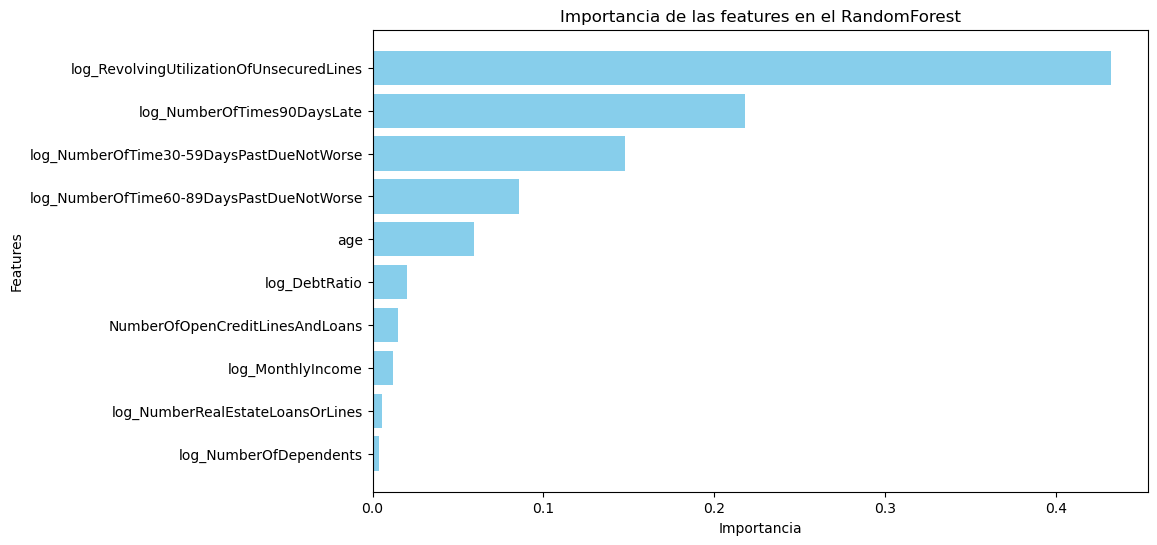

In [42]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Features'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Importancia de las features en el RandomForest')
plt.gca().invert_yaxis()
plt.show()

CatBoost:

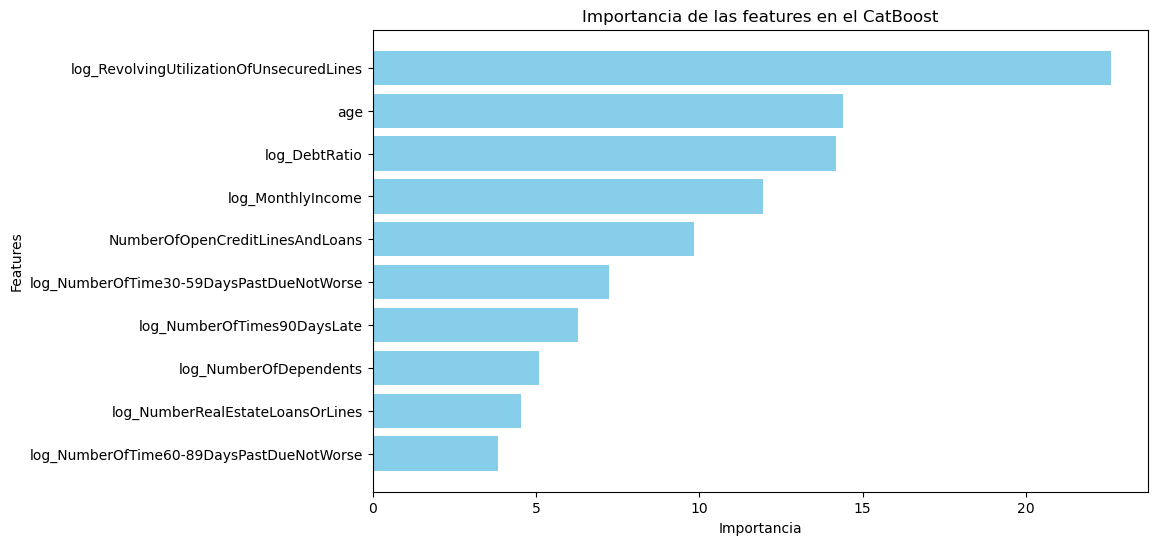

In [43]:
feature_importance_cat = cat.feature_importances_

feature_importance_df_cat = pd.DataFrame({
    'Features':X_train.columns,
    'Importance':feature_importance_cat
})

feature_importance_df_cat = feature_importance_df_cat.sort_values('Importance',ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_cat['Features'], feature_importance_df_cat['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Importancia de las features en el CatBoost')
plt.gca().invert_yaxis()
plt.show()

Parece ser que todas al final han contribuido, si bien con un peso desigual en cada modelo.    
De hecho, en el RandomForest, se mantiene como features importantes casi todas las que más correlación tenían, sin embargo en el CatBoost, no es así. DUDA????

#### Optimización hiperparámetros

##### KNN

In [44]:
recall_opt = []
macro_recall_opt = []
micro_recall_opt = []



for k in range (1,21):
    knn_opt = KNeighborsClassifier(n_neighbors=k)
    scores_recall = cross_val_score(knn_opt,X_train, y_train, cv=5, scoring='recall')
    scores_macro = cross_val_score(knn_opt,X_train, y_train, cv=5, scoring='recall_macro')
    scores_micro = cross_val_score(knn_opt,X_train, y_train, cv=5, scoring='recall_micro')

    avg_recall = np.mean(scores_recall)
    avg_macro_recall = np.mean(scores_macro)
    avg_micro_recall = np.mean(scores_micro)

    recall_opt.append(avg_recall)
    macro_recall_opt.append(avg_macro_recall)
    micro_recall_opt.append(avg_micro_recall)

best_k_recall = np.argmax(recall_opt)+1
best_k_macro = np.argmax(macro_recall_opt)+1
best_k_micro = np.argmax(micro_recall_opt)+1

print(f'El mejor k para recall es {best_k_recall:.2f}')
print()
print(f'El mejor k para macro es {best_k_macro:.2f}')
print()
print(f'El mejor k para micro es {best_k_micro:.2f}')
print()





El mejor k para recall es 1.00

El mejor k para macro es 1.00

El mejor k para micro es 18.00



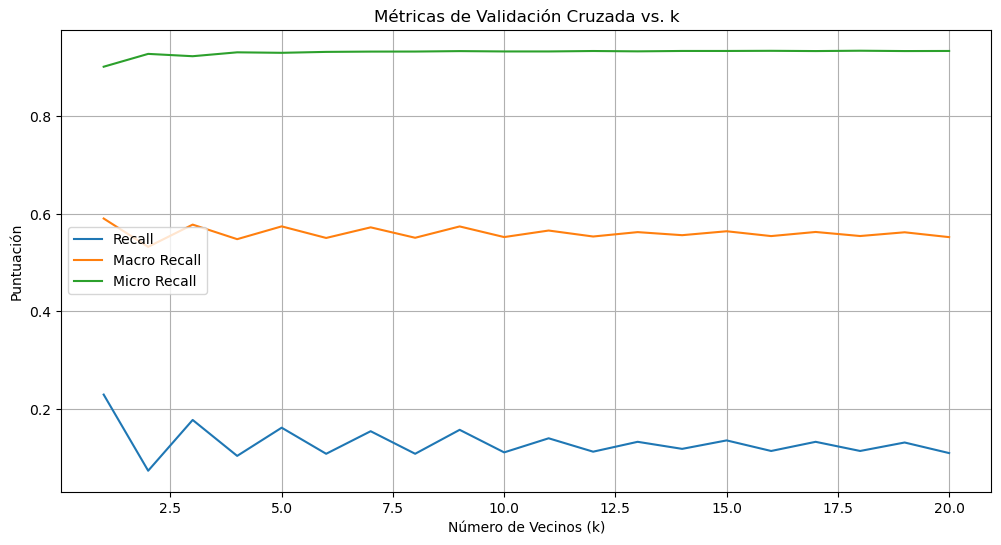

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), recall_opt, label='Recall')
plt.plot(range(1, 21), macro_recall_opt, label='Macro Recall')
plt.plot(range(1, 21), micro_recall_opt, label='Micro Recall')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Puntuación')
plt.title('Métricas de Validación Cruzada vs. k')
plt.legend()
plt.grid(True)
plt.show()

##### RandomForest

In [46]:
rf_opt = RandomForestClassifier(random_state = 42)

params_grid = {
    "n_estimators": [100,200],
    "max_depth": [8,10,20],
    "max_features": ["sqrt","log2",None],
    "max_samples": [0.3,0.6,1],
    "min_samples_split": [2, 5, 10] ,
    "min_samples_leaf":[10, 20, 40],
    "class_weight" : ['balanced','balance_subsample'] 
    
}

rf_grid = RandomizedSearchCV(rf_opt, 
                        cv = 5,
                        param_distributions= params_grid,
                        scoring = 'recall',
                        n_jobs = -1)


rf_grid.fit(X_train, y_train)
y_predict_rf_opt = rf_grid.predict(X_train)
print(classification_report(y_train,y_predict_rf_opt))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      9329
           1       0.24      0.75      0.36       691

    accuracy                           0.82     10020
   macro avg       0.61      0.79      0.63     10020
weighted avg       0.93      0.82      0.86     10020



In [47]:
rf_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 40,
 'max_samples': 0.3,
 'max_features': 'sqrt',
 'max_depth': 10,
 'class_weight': 'balanced'}

##### CatBoost

In [48]:
cat_opt = CatBoostClassifier(random_state= 42, verbose = False)

param_grid= {'depth': [3, 6, 12],
          'learning_rate': [0.1, 0.4, 0.8],
          'colsample_bylevel': [0.5,1,2],
          'iterations': [250,500],
          "border_count": [125,250]
          }


cat_grid = RandomizedSearchCV(cat_opt, 
                               cv = 3,
                               n_iter = 3,
                               param_distributions= param_grid, 
                               scoring = ("recall"))


cat_grid.fit(X_train, y_train)
y_predict_cat_opt = cat_grid.predict(X_train)
print(classification_report(y_train,y_predict_cat_opt))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9329
           1       0.96      0.56      0.71       691

    accuracy                           0.97     10020
   macro avg       0.96      0.78      0.85     10020
weighted avg       0.97      0.97      0.96     10020



In [49]:
cat_grid.best_params_

{'learning_rate': 0.8,
 'iterations': 250,
 'depth': 3,
 'colsample_bylevel': 1,
 'border_count': 250}

#### Procesamiento de test_set
Voy a ha hacer todas las transformaciones que he realizado a train_set para poder comparar contra los datos de test.

In [50]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2508 entries, 10378 to 6620
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      2508 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  2508 non-null   float64
 2   age                                   2508 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  2508 non-null   int64  
 4   DebtRatio                             2508 non-null   float64
 5   MonthlyIncome                         2370 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       2508 non-null   int64  
 7   NumberOfTimes90DaysLate               2508 non-null   int64  
 8   NumberRealEstateLoansOrLines          2508 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  2508 non-null   int64  
 10  NumberOfDependents                    2472 non-null   float64
dtypes: float64(4), int

In [51]:
test_set_copy = test_set.copy()
test_set.drop_duplicates(keep='first', inplace=True)
test_set.shape

(2508, 11)

In [52]:
# Variable 'MonthlyIncome'
mediana_dict = mediana_monthly.set_index('NumberRealEstateLoansOrLines')['mediana_income'].to_dict()

# Función para llenar los valores nulos en MonthlyIncome
def fill_na_with_median(row):
    if np.isnan(row['MonthlyIncome']):
        return mediana_dict.get(row['NumberRealEstateLoansOrLines'], row['MonthlyIncome'])
    return row['MonthlyIncome']

# Asumiendo que test_set es tu DataFrame con los datos de test
# Aplicar la función para llenar los valores nulos
test_set['MonthlyIncome'] = test_set.apply(fill_na_with_median, axis=1)

# Verificar si hay valores nulos restantes en MonthlyIncome
print(test_set['MonthlyIncome'].isnull().sum())

0


In [53]:
# Variable 'NumberOfDependents'
mediana_dict = mediana_dep.set_index('age')['mediana_dependents'].to_dict()

# Función para llenar los valores nulos en MonthlyIncome
def fill_na_with_median(row):
    if np.isnan(row['NumberOfDependents']):
        return mediana_dict.get(row['age'], row['NumberOfDependents'])
    return row['NumberOfDependents']

# Asumiendo que test_set es tu DataFrame con los datos de test
# Aplicar la función para llenar los valores nulos
test_set['NumberOfDependents'] = test_set.apply(fill_na_with_median, axis=1)

# Verificar si hay valores nulos restantes en MonthlyIncome
print(test_set['NumberOfDependents'].isnull().sum())

0


In [54]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2508 entries, 10378 to 6620
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      2508 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  2508 non-null   float64
 2   age                                   2508 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  2508 non-null   int64  
 4   DebtRatio                             2508 non-null   float64
 5   MonthlyIncome                         2508 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       2508 non-null   int64  
 7   NumberOfTimes90DaysLate               2508 non-null   int64  
 8   NumberRealEstateLoansOrLines          2508 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  2508 non-null   int64  
 10  NumberOfDependents                    2508 non-null   float64
dtypes: float64(4), int

In [55]:

for col in features_log:
    test_set[f'log_{col}'] = test_set[col].apply(lambda x: np.log(x + 1))
    test_set[f'log_{col}'] = scalers_log[col].transform(test_set[[f'log_{col}']])

for col in features_scaler:
    test_set[col] = scalers_normal[col].transform(test_set[[col]])

In [56]:
columnas_eliminar_test = ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'
       ]
X_test = test_set.drop(columns=columnas_eliminar_test)
y_test = test_set['SeriousDlqin2yrs']

X_test.columns

Index(['age', 'NumberOfOpenCreditLinesAndLoans',
       'log_RevolvingUtilizationOfUnsecuredLines',
       'log_NumberOfTime30-59DaysPastDueNotWorse', 'log_DebtRatio',
       'log_MonthlyIncome', 'log_NumberOfTimes90DaysLate',
       'log_NumberRealEstateLoansOrLines',
       'log_NumberOfTime60-89DaysPastDueNotWorse', 'log_NumberOfDependents'],
      dtype='object')

#### Evaluación del modelo (contra Test)


##### KNN
Contra test

In [57]:
knn_opt_test = KNeighborsClassifier(n_neighbors=1)

knn_opt_test.fit(X_train,y_train)

y_predict_knn_opt = knn_opt_test.predict(X_test)

macro_recall = recall_score(y_test,y_predict_knn_opt, average='macro')
micro_recall = recall_score(y_test,y_predict_knn_opt, average='micro')
balanced_accuracy = balanced_accuracy_score(y_test, y_predict_knn_opt)

print(f'Macro Average Recall: {macro_recall:.3f}')
print(f'Micro Average Recall: {micro_recall:.3f}')
print(f'Balanced Accuracy: {balanced_accuracy:.3f}')

Macro Average Recall: 0.613
Micro Average Recall: 0.907
Balanced Accuracy: 0.613


##### RandomForest
Contra test

In [58]:
y_predict_rf = rf_grid.predict(X_test)
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      2335
           1       0.24      0.72      0.36       173

    accuracy                           0.82      2508
   macro avg       0.61      0.77      0.63      2508
weighted avg       0.92      0.82      0.86      2508



##### CatBoost
Contra test


In [59]:
y_predict_cat = cat_grid.predict(X_test)
print(classification_report(y_test,y_predict_cat))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2335
           1       0.46      0.25      0.33       173

    accuracy                           0.93      2508
   macro avg       0.70      0.62      0.64      2508
weighted avg       0.91      0.93      0.92      2508



#### Equilibrado
DUDA: ¿Dónde se hace dentro del proceso de ML?

In [60]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
y_train_smote.value_counts()

SeriousDlqin2yrs
0    9329
1    9329
Name: count, dtype: int64

In [61]:
# RandomForest sin optimizar
rf_smote = rf.fit(X_train_smote,y_train_smote)

y_predict = rf_smote.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      2335
           1       0.19      0.77      0.31       173

    accuracy                           0.76      2508
   macro avg       0.59      0.77      0.58      2508
weighted avg       0.92      0.76      0.82      2508



In [62]:
# RandomForest optimizado
rf_smote = rf_grid.fit(X_train_smote,y_train_smote)

y_predict = rf_smote.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2335
           1       0.07      1.00      0.13       173

    accuracy                           0.07      2508
   macro avg       0.03      0.50      0.06      2508
weighted avg       0.00      0.07      0.01      2508



#### Análisis de los errores

##### normalize = true

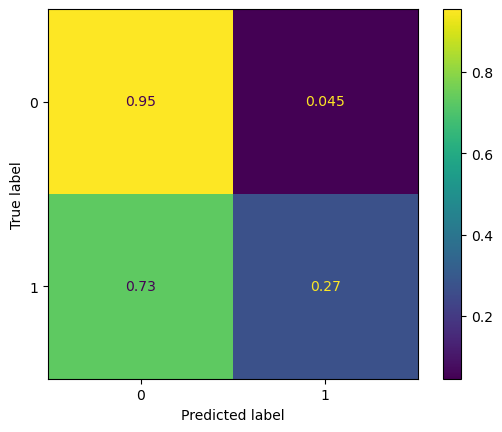

In [63]:
# Errores con predict según Knn optimizado
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_knn_opt, normalize='true');

In [64]:
# Errores con predict según RandomForest optimizado
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_rf_opt, normalize='true');

ValueError: Found input variables with inconsistent numbers of samples: [2508, 10020]

In [65]:
# Errores con predict según CatBoost optimizado
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_cat_opt, normalize='true');

ValueError: Found input variables with inconsistent numbers of samples: [2508, 10020]

##### normalize = pred

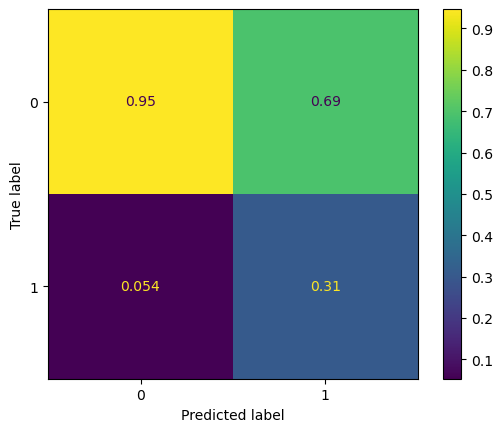

In [66]:
# KNN
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_knn_opt, normalize='pred');

In [67]:
# RandomForest
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_rf_opt, normalize='pred');

ValueError: Found input variables with inconsistent numbers of samples: [2508, 10020]

In [68]:
# CatBoost
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_cat_opt, normalize='pred');

ValueError: Found input variables with inconsistent numbers of samples: [2508, 10020]